In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import joblib

In [2]:
df=pd.read_csv("C:/Users/User/Downloads/New Folder/EmoDB_Features.csv")
df.head()

,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,MFCC 10,...,Std LPC,ZCR,Total Energy,Mean Energy,Std Energy,Pitch,Intensity,HNR,RMS,Label
0,-6.9953,1.8895,-0.081841,0.90538,0.394930,0.005155,-0.106280,-0.10136,-0.40559,0.112270,...,0.57646,0.15175,1561.10,45.914,35.755,294.04,101.660,12.269,0.133360,Angry
1,-8.0600,2.0375,-0.634890,0.13142,0.083776,-0.021593,-0.062161,-0.31492,-0.20682,-0.004149,...,0.59482,0.14447,1515.20,27.549,35.861,312.55,96.238,13.197,0.091556,Angry
2,-7.6706,2.0008,-0.714240,0.63257,-0.026630,-0.181460,-0.072693,-0.12454,-0.36399,0.027054,...,0.73191,0.14299,1245.00,34.582,48.531,333.34,97.849,13.232,0.100060,Angry
3,-6.8889,2.2669,-0.507980,0.70099,-0.020637,0.141880,0.184720,-0.13929,-0.30131,0.022454,...,0.65569,0.10240,1695.50,51.378,45.933,307.19,101.350,15.732,0.136940,Angry
4,-7.9043,1.8447,-0.739920,0.63881,-0.310140,-0.123020,0.060770,-0.26859,-0.37231,-0.098648,...,0.71652,0.12719,850.87,21.272,23.820,305.09,96.954,13.645,0.083822,Angry


In [3]:
df.shape

(230, 121)

In [4]:
class_counts = df['Label'].value_counts()

In [5]:
class_counts

Angry      46
Disgust    46
Fearful    46
Happy      46
Sad        46
Name: Label, dtype: int64

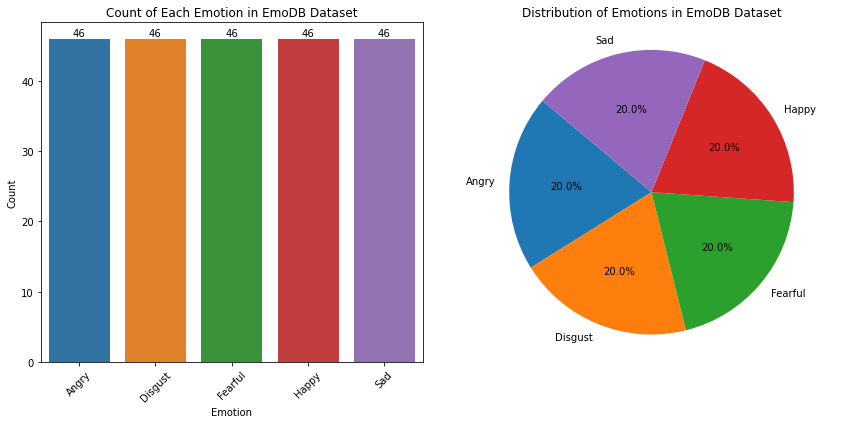

In [6]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot on the first subplot
sns.countplot(x='Label', data=df, order=class_counts.index, ax=axs[0])
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of Each Emotion in EmoDB Dataset')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Get bar counts
bar_counts = axs[0].containers[0]
# Add annotations (class counts) on top of each bar
for bar, count in zip(bar_counts, class_counts):
    yval = bar.get_height()  # Get the height of each bar
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, count, ha='center', va='bottom')  # Add text annotation with class count

# Plot the pie chart on the second subplot
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Emotions in EmoDB Dataset')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
X = df.iloc[:,:-1]
y = df['Label']

In [38]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

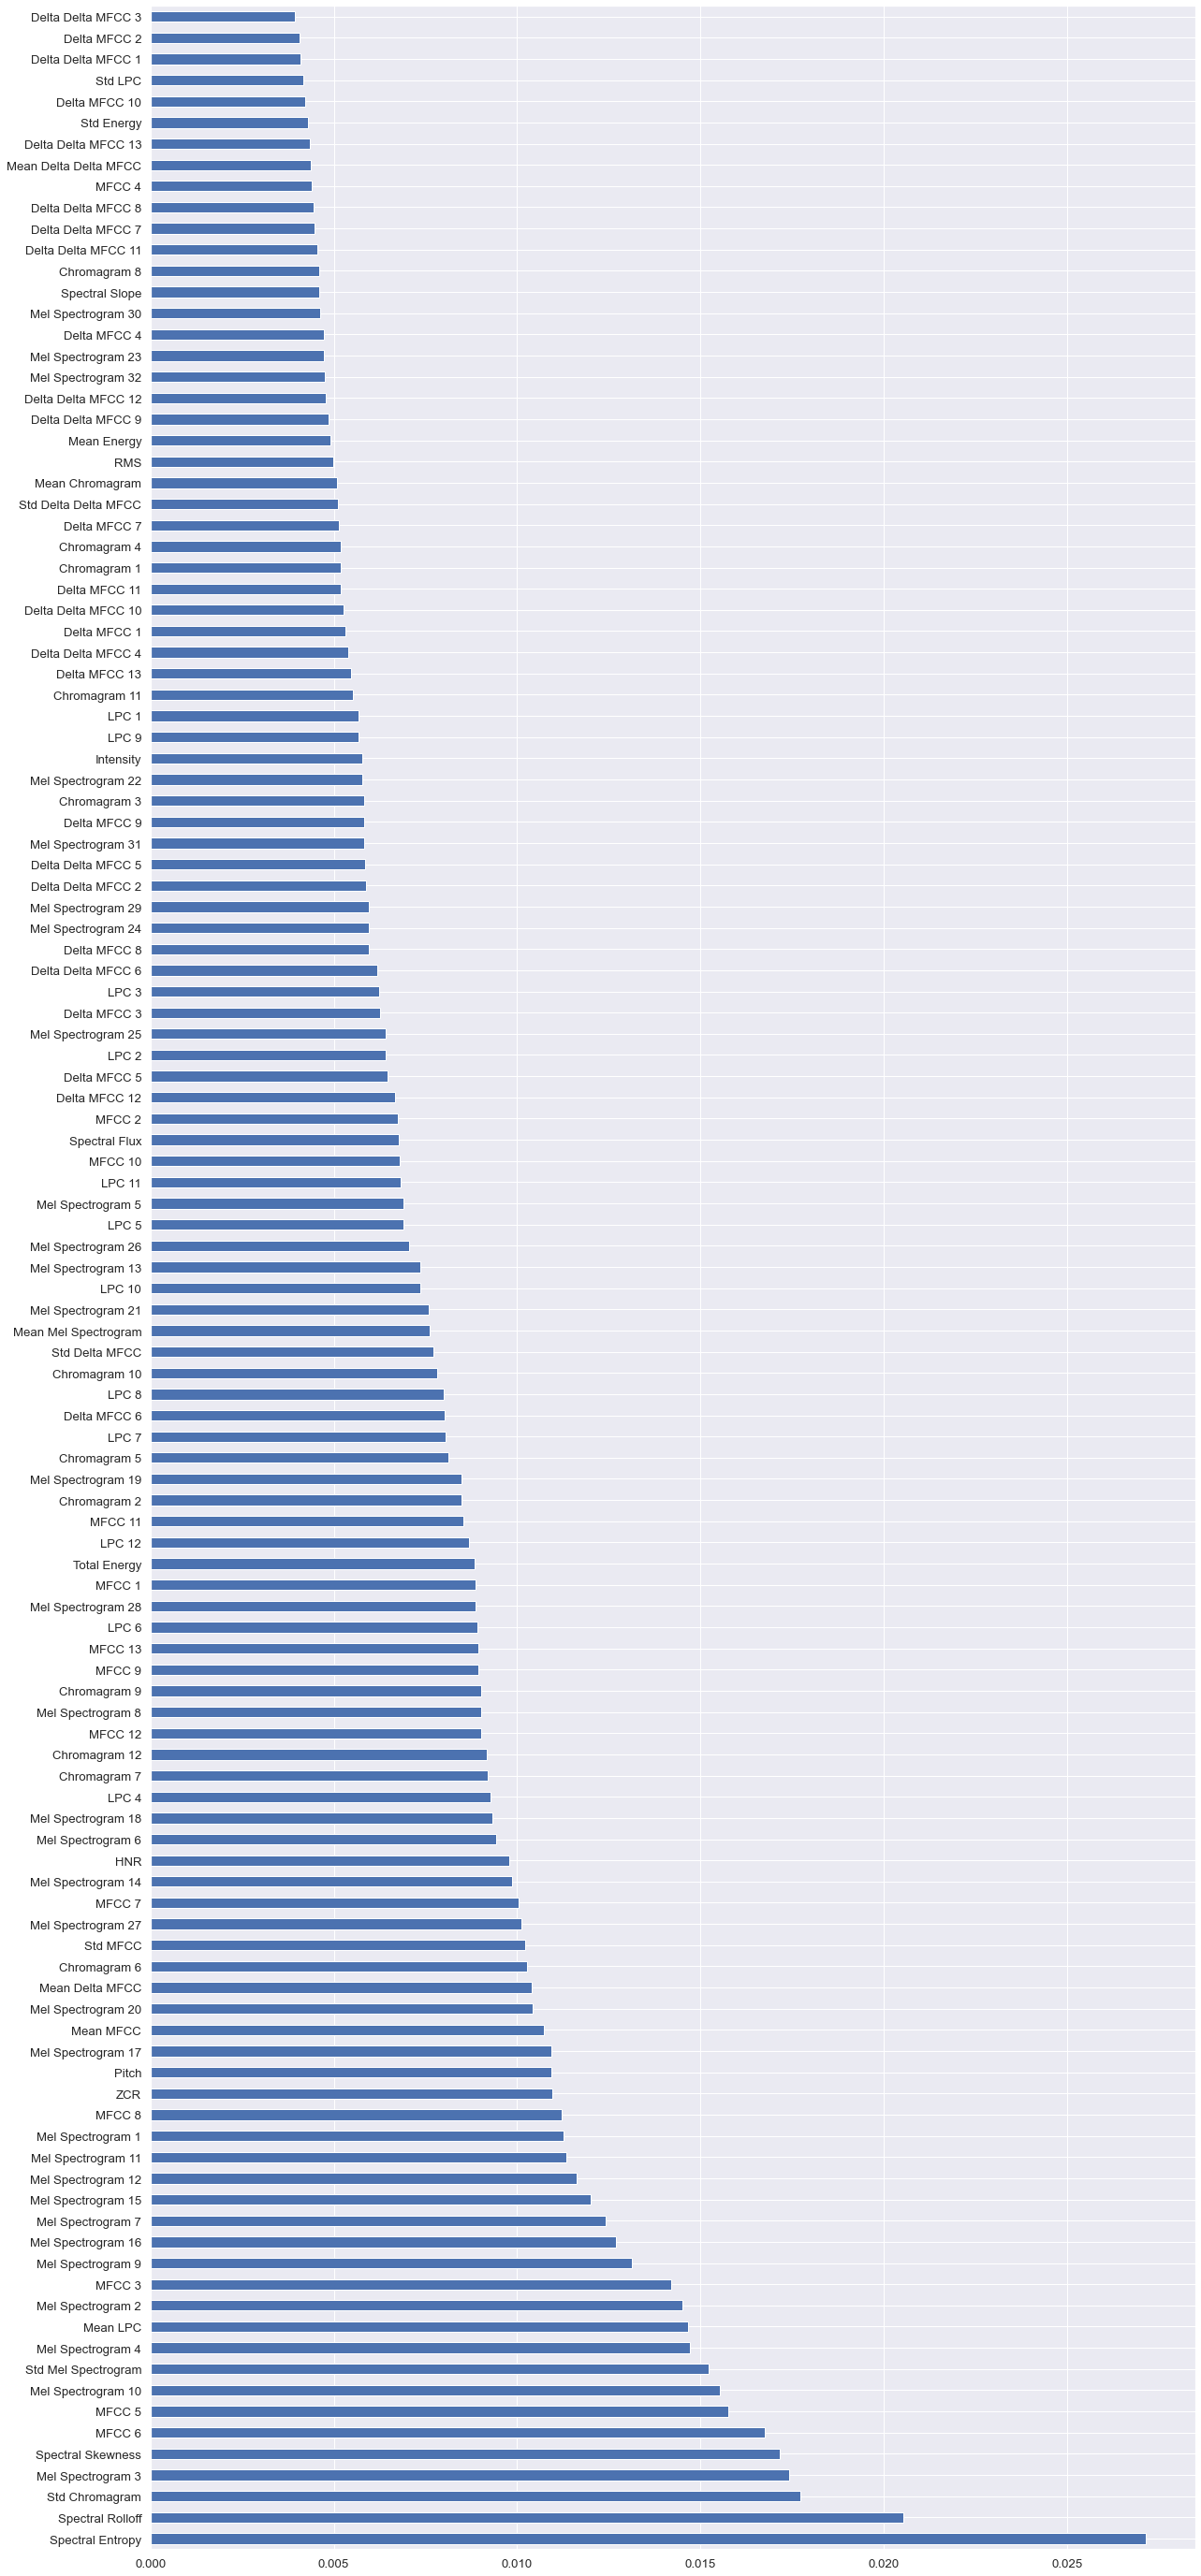

In [39]:
fea = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20, 50))
fea.nlargest(120).plot(kind='barh')
plt.show()

In [40]:
selected_features = fea.nlargest(30).index

X = X[selected_features]
y = df['Label']

In [41]:
selected_features

Index(['Spectral Entropy', 'Spectral Rolloff', 'Std Chromagram',
       'Mel Spectrogram 3', 'Spectral Skewness', 'MFCC 6', 'MFCC 5',
       'Mel Spectrogram 10', 'Std Mel Spectrogram', 'Mel Spectrogram 4',
       'Mean LPC', 'Mel Spectrogram 2', 'MFCC 3', 'Mel Spectrogram 9',
       'Mel Spectrogram 16', 'Mel Spectrogram 7', 'Mel Spectrogram 15',
       'Mel Spectrogram 12', 'Mel Spectrogram 11', 'Mel Spectrogram 1',
       'MFCC 8', 'ZCR', 'Pitch', 'Mel Spectrogram 17', 'Mean MFCC',
       'Mel Spectrogram 20', 'Mean Delta MFCC', 'Chromagram 6', 'Std MFCC',
       'Mel Spectrogram 27'],
      dtype='object')

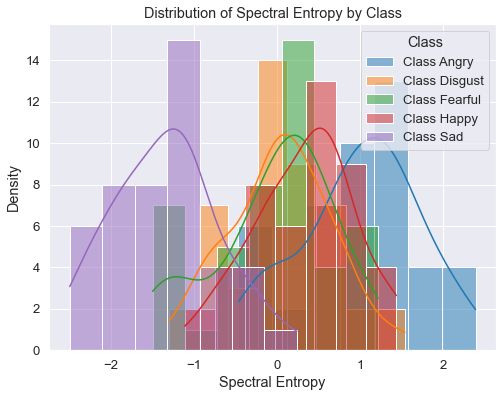

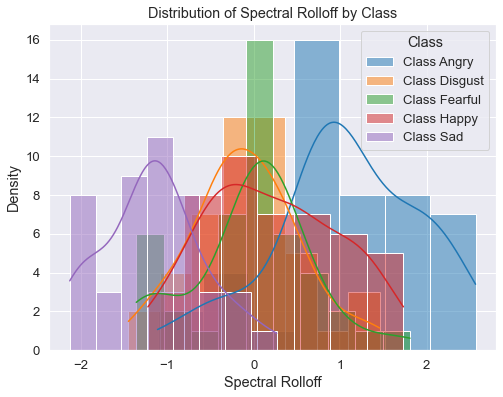

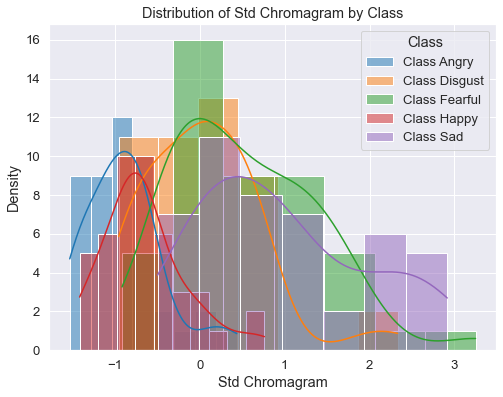

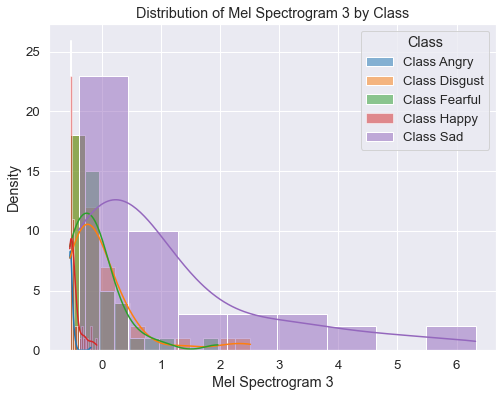

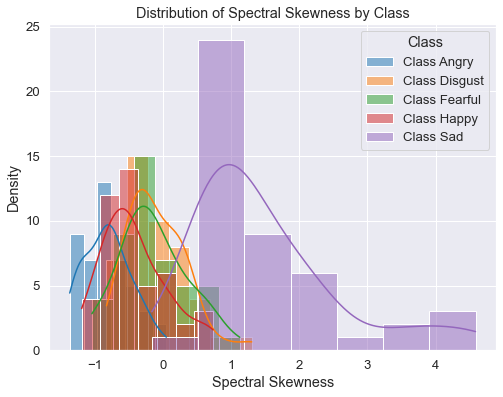

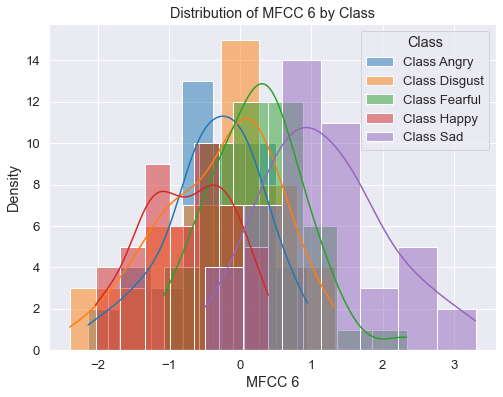

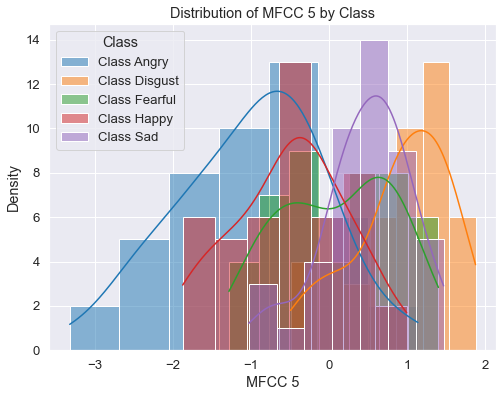

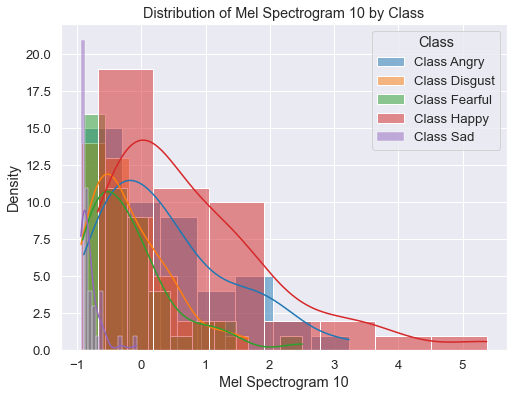

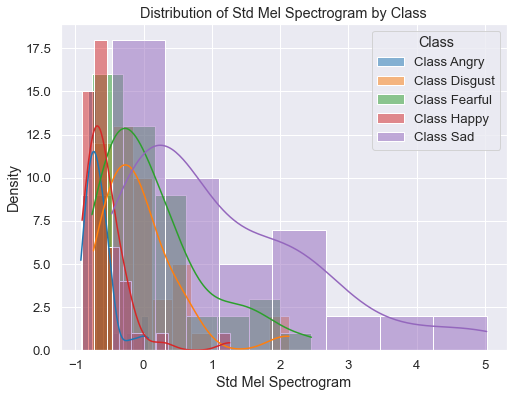

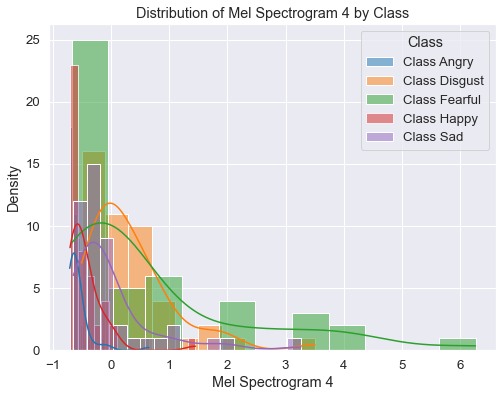

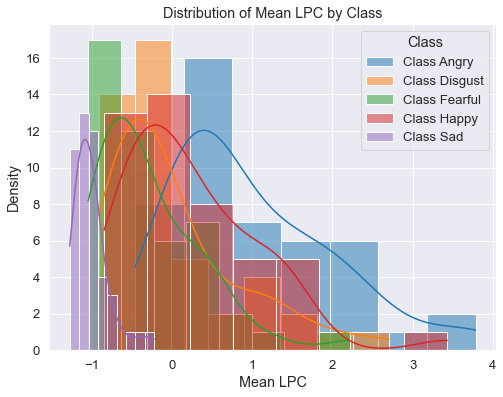

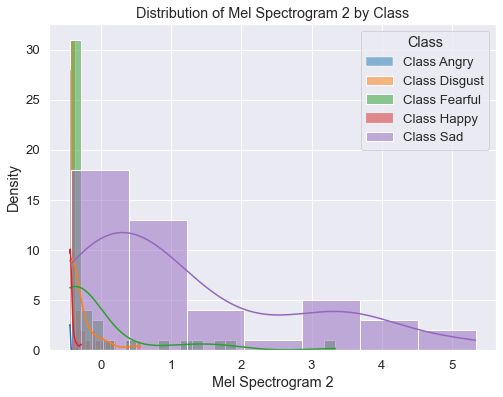

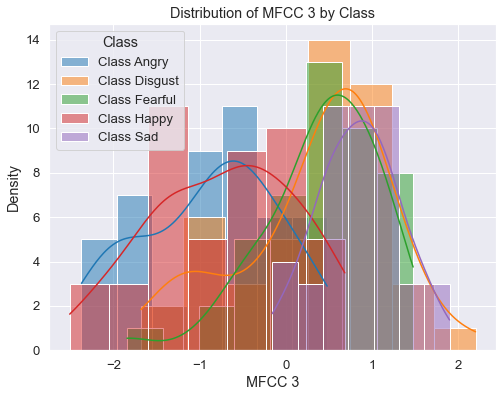

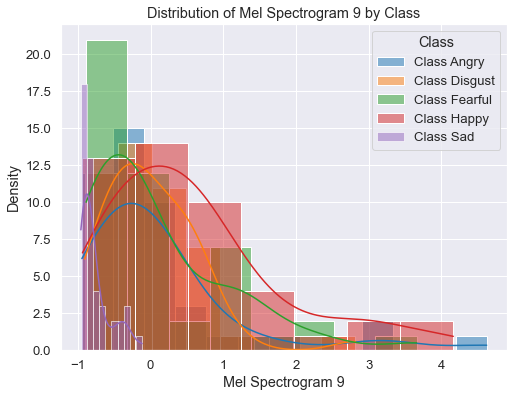

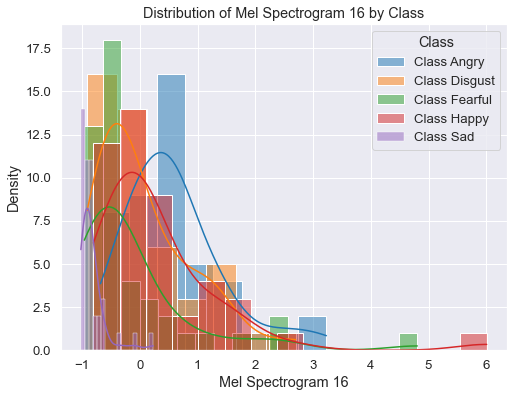

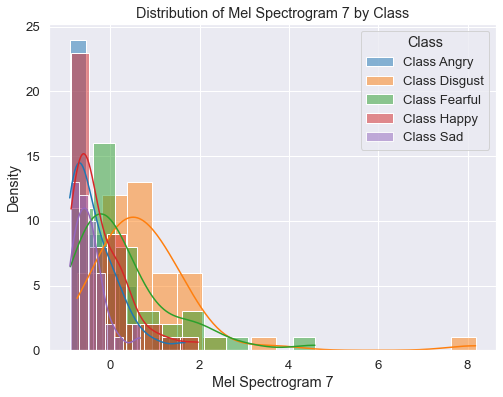

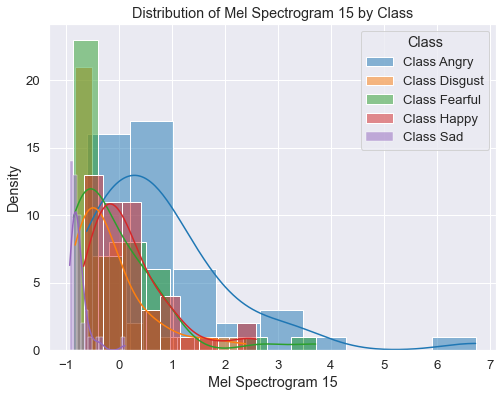

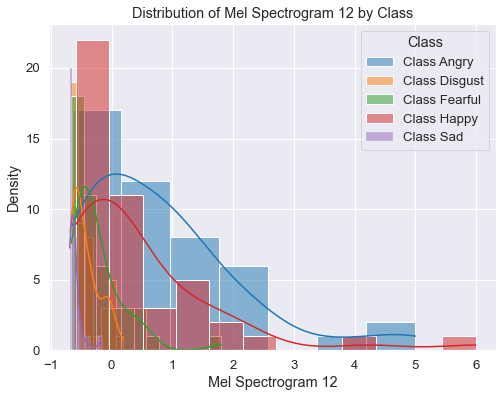

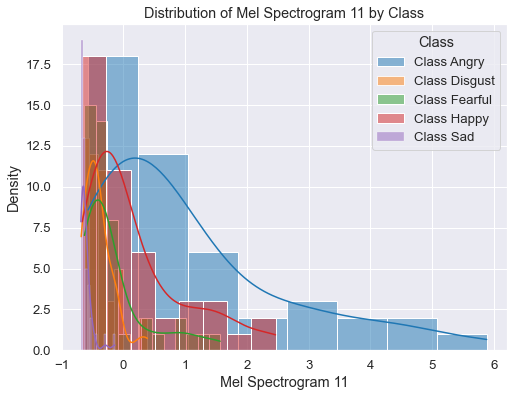

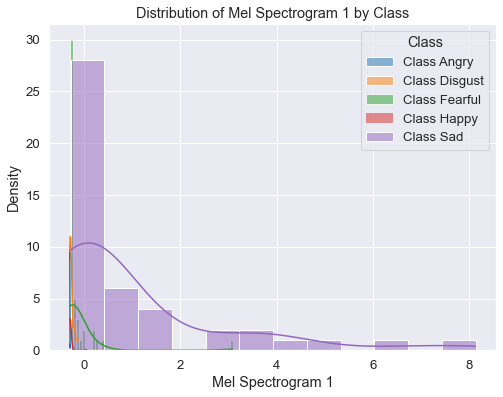

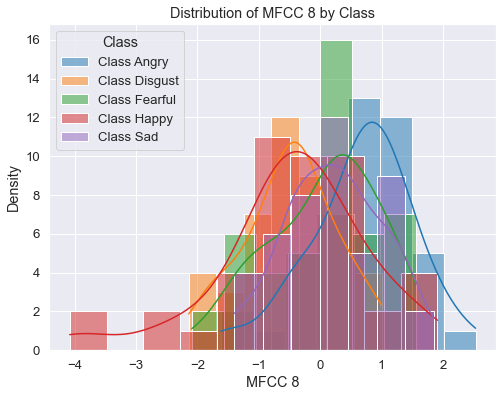

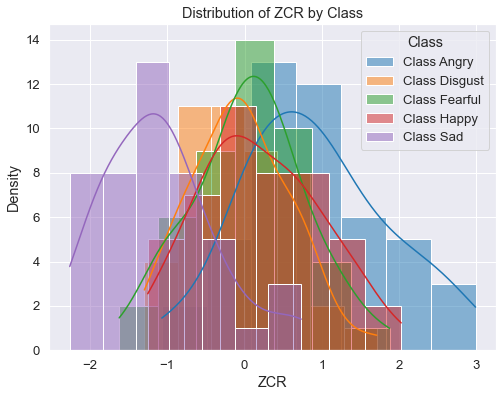

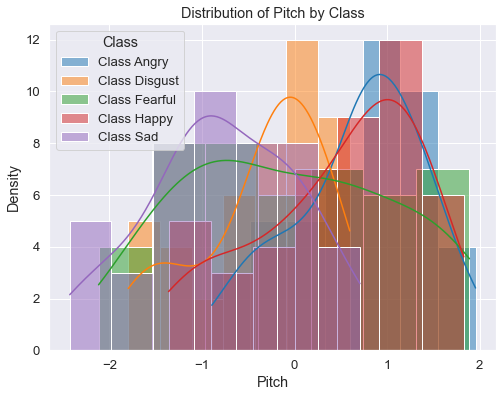

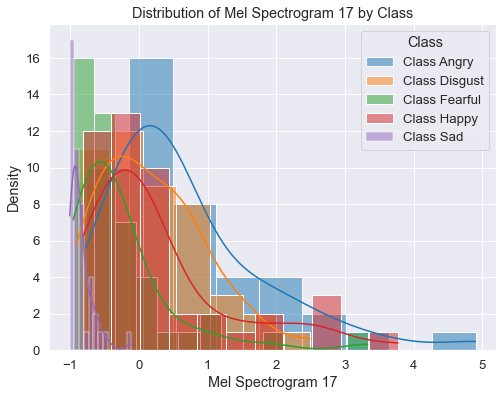

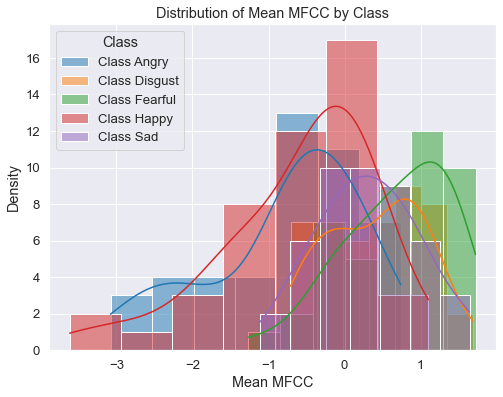

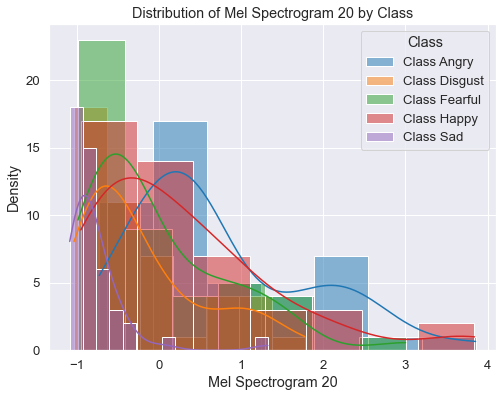

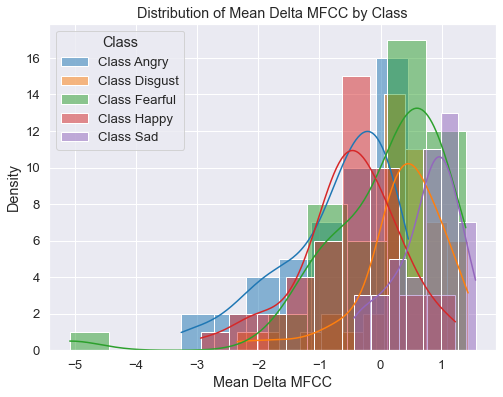

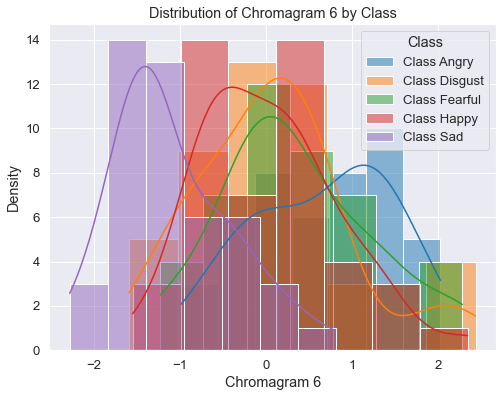

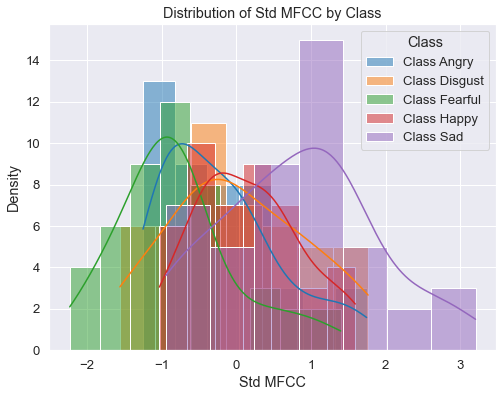

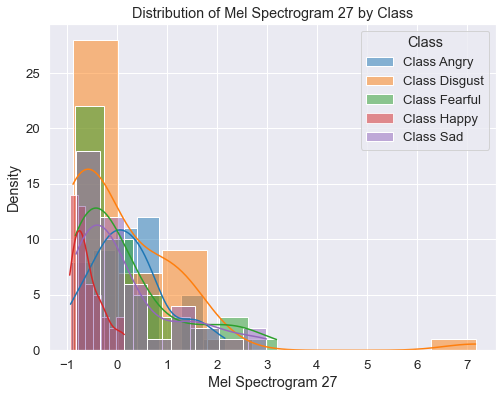

In [45]:
# Concatenate X and y into a single array for easier manipulation
data = np.column_stack((X, y))

# Get the number of features
num_features = X.shape[1]

# Define a custom color palette with 5 distinct colors
custom_palette = sns.color_palette("tab10", 5)

# Iterate over each feature and plot its distribution for each class
for i, feature_name in enumerate(selected_features):
    plt.figure(figsize=(8, 6))
    for label, color in zip(np.unique(y), custom_palette):
        sns.histplot(data[data[:, -1] == label, i], kde=True, label=f'Class {label}', color=color)
    plt.title(f'Distribution of {feature_name} by Class')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(title='Class')
    plt.show()

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# Initialize variables for best accuracy, C, gamma, model, best training and testing data
best_accuracy = 0
best_C = None
best_gamma = None
best_model = None
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None

# Initialize count for no improvement
no_improvement_count = 0  

# Initialize parameter values for grid search
C_values = np.arange(1, 21, 0.1)
gamma_values = np.arange(0.01, 1.01, 0.01)

while no_improvement_count < 100:  
    for C in C_values:  
        for gamma in gamma_values:  
            X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_train, y_train)
            y_pred = svm.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            
            if acc > best_accuracy:
                best_accuracy = acc
                best_C = C
                best_gamma = gamma
                best_model = svm
                best_X_train = X_train
                best_X_test = X_test
                best_y_train = y_train
                best_y_test = y_test
                
                no_improvement_count = 0
                
                print("Best accuracy so far:", best_accuracy)
                print("Best C value so far:", best_C)
                print("Best gamma value so far:", best_gamma)                
            else:
                no_improvement_count += 1

# Save the best model
joblib.dump(best_model, 'EmoDB Model.joblib')

# Save the best training and testing data
joblib.dump(best_X_train, 'X_train.joblib')
joblib.dump(best_X_test, 'X_test.joblib')
joblib.dump(best_y_train, 'y_train.joblib')
joblib.dump(best_y_test, 'y_test.joblib')

# Print the final best accuracy and the corresponding C and gamma values
print("Final best accuracy:", best_accuracy)
print("Final best C value:", best_C)
print("Final best gamma value:", best_gamma)

Best accuracy so far: 0.7608695652173914
Best C value so far: 1.0
Best gamma value so far: 0.01
Best accuracy so far: 0.782608695652174
Best C value so far: 1.0
Best gamma value so far: 0.05
Best accuracy so far: 0.8043478260869565
Best C value so far: 1.0
Best gamma value so far: 0.13
Best accuracy so far: 0.8695652173913043
Best C value so far: 1.0
Best gamma value so far: 0.15000000000000002
Best accuracy so far: 0.9130434782608695
Best C value so far: 1.6000000000000005
Best gamma value so far: 0.06999999999999999
Best accuracy so far: 0.9565217391304348
Best C value so far: 11.70000000000001
Best gamma value so far: 0.01
Final best accuracy: 0.9565217391304348
Final best C value: 11.70000000000001
Final best gamma value: 0.01


In [10]:
# Load the saved model
model = joblib.load('EmoDB Model.joblib')

# Load the saved training and testing data
X_train = joblib.load('X_train.joblib')
X_test = joblib.load('X_test.joblib')
y_train = joblib.load('y_train.joblib')
y_test = joblib.load('y_test.joblib')

In [11]:
# Predict on the test data
y_pred = model.predict(X_test)

In [12]:
# Generate the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       Angry       1.00      0.90      0.95        10
     Disgust       1.00      0.89      0.94         9
     Fearful       0.90      1.00      0.95         9
       Happy       0.90      1.00      0.95         9
         Sad       1.00      1.00      1.00         9

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



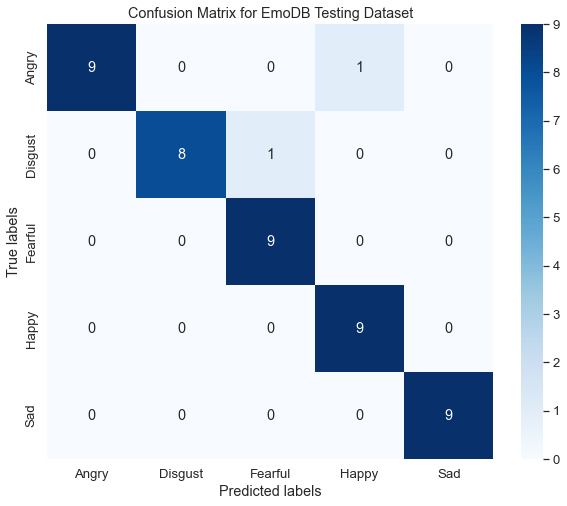

In [13]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = model.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for EmoDB Testing Dataset')
plt.show()

In [14]:
# Calculate accuracy of each class
class_accuracies = {}
for i, cls in enumerate(classes):
    # True positives for class i
    TP = cm[i, i]
    # Total instances for class i
    total_instances = np.sum(cm[i, :])
    # Accuracy for class i
    class_accuracy = TP / total_instances
    class_accuracies[cls] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for cls, accuracy in class_accuracies.items():
    print(f"{cls}: {accuracy:.2f}")

Class-wise Accuracies:
Angry: 0.90
Disgust: 0.89
Fearful: 1.00
Happy: 1.00
Sad: 1.00


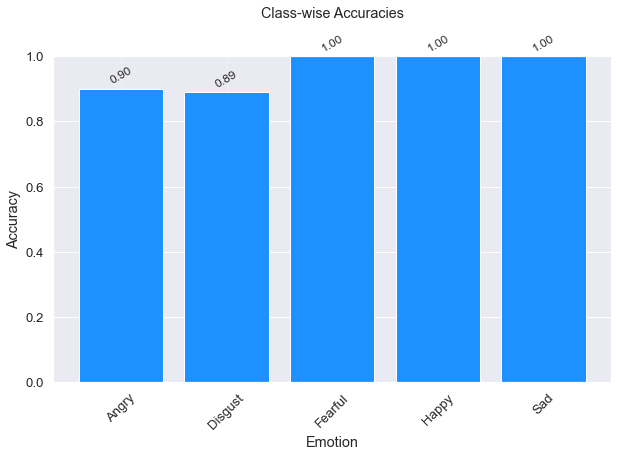

In [16]:
# Extract class labels and accuracies
class_labels = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, accuracies, color='dodgerblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies\n\n')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add horizontal grid lines
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12, rotation=30)
plt.show()

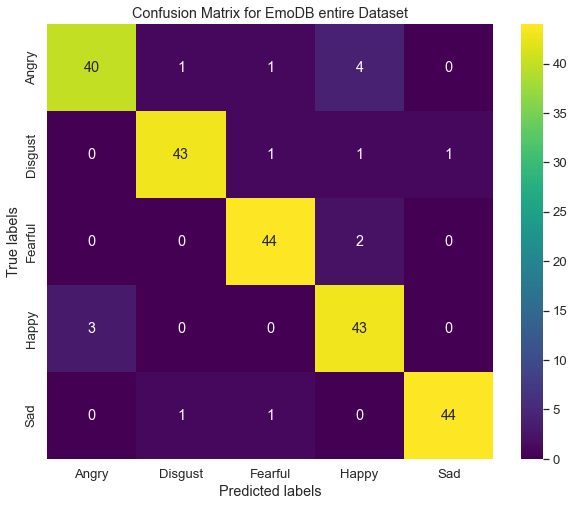

In [17]:
# Generate predictions for the entire dataset
y_pred_full = model.predict(X)

# Generate the confusion matrix
cm_full = confusion_matrix(y, y_pred_full)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm_full, annot=True, cmap='viridis', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for EmoDB entire Dataset')
plt.show()

In [18]:
# Calculate accuracy of each class
class_accuracies = {}
for i, cls in enumerate(classes):
    # True positives for class i
    TP = cm_full[i, i]
    # Total instances for class i
    total_instances = np.sum(cm_full[i, :])
    # Accuracy for class i
    class_accuracy = TP / total_instances
    class_accuracies[cls] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for cls, accuracy in class_accuracies.items():
    print(f"{cls}: {accuracy:.2f}")

Class-wise Accuracies:
Angry: 0.87
Disgust: 0.93
Fearful: 0.96
Happy: 0.93
Sad: 0.96


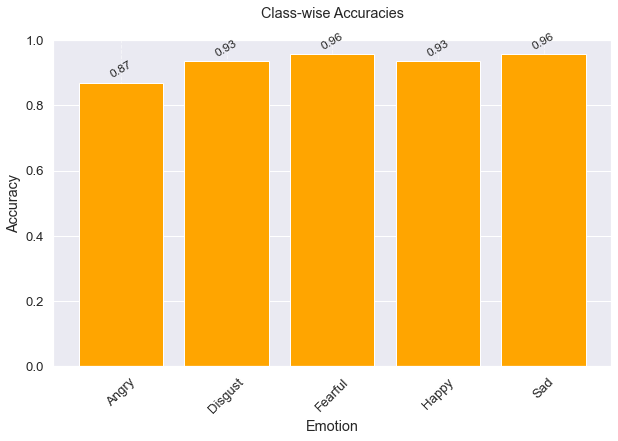

In [19]:
# Extract class labels and accuracies
class_labels = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, accuracies, color='orange')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies\n')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add horizontal grid lines
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12, rotation=30)
plt.show()